In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib import cm

# Problems

The pizza is represented as a rectangular, 2 dimensional grid of $R$ rows and $C$ columns. The cells within the
grid are referenced using a pair of 0 based coordinates $[r, c]$, denoting respectively the row and the
column of the cell.

Each cell of the pizza contains either:

* mushroom, represented in the input file as M; or
* tomato, represented in the input file as T

In [3]:
PROBLEM_A = "a_example.in"
PROBLEM_B = "b_small.in"
PROBLEM_C = "c_medium.in"
PROBLEM_D = "d_big.in"

# Input

**Slice:** A slice of pizza is a rectangular section of the pizza delimited by two rows and two columns, without holes.
The slices we want to cut out must contain at least $L$ cells of each ingredient (that is, at least $L$ cells of
mushroom and at least L cells of tomato) and at most $H$ cells of any kind in total surprising as it is, there is
such a thing as too much pizza in one slice.

The slices being cut out cannot overlap. The slices being cut do not need to cover the entire pizza

 * $R$ : number of rows
 * $C$ : number of columns
 * $L$ : minimum number of ingredients in a slice
 * $H$ : maximum number of cells in a slice

# Output

The file must consist of:

* one line containing a single natural number $S (0 \leq S \leq R \times C)$ , representing the total number of slices to be cut

* $S$ lines describing the slices. Each of these lines must contain the following natural numbers separated by single spaces.
  * $r_1, c_1, r_2, c_2 (0 \leq r_1, r_2 < R, 0 \leq c_1, c_2 < C) $
  
```
3           3 slices.
0 0 2 1     First slice between rows (0,2) and columns (0,1).
0 2 2 2     Second slice between rows (0,2) and columns (2,2).
0 3 2 4     Third slice between rows (0,2) and columns (3,4).
```

# Loader

In [4]:
from math import sqrt, log
import functools

In [5]:
def compose(*fs):
    return functools.reduce(lambda f, g: lambda x: f(g(x)), fs, lambda x: x)

In [6]:
f_strip = lambda x: x.strip()
f_map = lambda x: 1 if x == 'M' else -1

In [7]:
def load_problem(problem):
    with open(problem) as f:
        content = f.readlines()
        content = list(map(f_strip, content))
        R, C, L, H = list(map(int, content[0].split(' ')))
        M = np.array(list(map(lambda x: list(map(f_map, list(x))), content[1:])))
        return R, C, L, H, M

In [8]:
def plot_problem(M, title=""):
    plt.figure(figsize=(16,16))
    plt.title(title)
    imshow(M, cmap=cm.hot)
    plt.axis('off')
    plt.grid()

# Algorithm

In [9]:
def partitionize1(M):
    w, h = M.shape

    if w % 2 == 1: w -= 1
    if h % 2 == 1: h -= 1

    T = np.array([False] * (M.shape[0] * M.shape[1])).reshape(M.shape)

    for x in range(0, h, 2):
        for y in range(0, w, 2):  
            sli = M[y:y+2, x:x+2]  
            if abs(sum(M[y:y+2, x:x+2])) < 4:    
                T[y:y+2, x:x+2] = True   
            else:
                y+=1
                
    f = np.vectorize(lambda x: 1 if x else 0)
    T = f(T)
    total = sum(T)
    maximum = M.shape[0] * M.shape[1]
    score = total / maximum
    print('Total score: {}'.format(total))
    print('Max score: {}'.format(maximum))
    print('Efficiency: {}%'.format(round(score*100, 2)))
    return T

In [10]:
def partitionize2(M):
    w, h = M.shape

    if w % 2 == 1: w -= 1
    if h % 2 == 1: h -= 1

    T = np.array([False] * (M.shape[0] * M.shape[1])).reshape(M.shape)
    
    x=0
    while x < h:
        y = 0
        while y < w:
            sli = M[y:y+2, x:x+2]  
            if abs(sum(M[y:y+2, x:x+2])) < 4:    
                T[y:y+2, x:x+2] = True   
                y += 2
            else:
                y +=1
        x += 2
    
    f = np.vectorize(lambda x: 1 if x else 0)
    T = f(T)
    total = sum(T)
    maximum = M.shape[0] * M.shape[1]
    score = total / maximum
    print('Total score: {}'.format(total))
    print('Max score: {}'.format(maximum))
    print('Efficiency: {}%'.format(round(score*100, 2)))
    return T

In [11]:
def partitionize3(M):
    w, h = M.shape

    if w % 2 == 1: w -= 1
    if h % 2 == 1: h -= 1

    T = np.array([False] * (M.shape[0] * M.shape[1])).reshape(M.shape)
    
    y=0
    while y < w:    
        x = 0
        while x < h:
            sli = M[y:y+2, x:x+2]  
            if abs(sum(M[y:y+2, x:x+2])) < 4:    
                T[y:y+2, x:x+2] = True   
                x += 2
            else:
                x +=1
        y += 2
    
    f = np.vectorize(lambda x: 1 if x else 0)
    T = f(T)
    total = sum(T)
    maximum = M.shape[0] * M.shape[1]
    score = total / maximum
    print('Total score: {}'.format(total))
    print('Max score: {}'.format(maximum))
    print('Efficiency: {}%'.format(round(score*100, 2)))
    return T

In [12]:
def partitionize4(M):
    w, h = M.shape

    if w % 2 == 1: w -= 1
    if h % 2 == 1: h -= 1

    T = np.array([False] * (M.shape[0] * M.shape[1])).reshape(M.shape)
    
    y=0
    while y < w:    
        x = 0
        while x < h:
            sli = M[y:y+2, x:x+2]  
            if abs(sum(M[y:y+2, x:x+2])) < 4:    
                #T[y:y+2, x:x+2] = True   
                #x += 2
                k=0
                while x + k < C and abs(sum(M[y:y+2, x:x+2+k])) < (2 * (2 + k)):
                    T[y:y+2, x:x+2+k] = True   
                    k+=1
                x += k+1
            else:
                x +=1
        y += 2
    
    f = np.vectorize(lambda x: 1 if x else 0)
    T = f(T)
    total = sum(T)
    maximum = M.shape[0] * M.shape[1]
    score = total / maximum
    print('Total score: {}'.format(total))
    print('Max score: {}'.format(maximum))
    print('Efficiency: {}%'.format(round(score*100, 2)))
    return T

In [13]:
def partitionize5(M):
    w, h = M.shape

    if w % 2 == 1: w -= 1
    if h % 2 == 1: h -= 1

    T = np.array([False] * (M.shape[0] * M.shape[1])).reshape(M.shape)
    
    y=0
    while y < w:    
        x = 0
        while x < h:
            sli = M[y:y+2, x:x+2]  
            if abs(sum(M[y:y+2, x:x+2])) < 4:    
                #T[y:y+2, x:x+2] = True   
                #x += 2
                k=0; q=0;
                while x + k < C and abs(sum(M[y:y+2, x:x+2+k])) < (2 * (2 + k)):
                    T[y:y+2, x:x+2+k] = True   
                    k+=1
                while x < 4 and x + q > 0 and abs(sum(M[y:y+2, x-q:x+2+k])) < (2 * (2 + k + q)):
                    T[y:y+2, x-q:x+2+k] = True   
                    q-=1
                x += k+1
            else:
                x +=1
        y += 2
    
    f = np.vectorize(lambda x: 1 if x else 0)
    T = f(T)
    total = sum(T)
    maximum = M.shape[0] * M.shape[1]
    score = total / maximum
    print('Total score: {}'.format(total))
    print('Max score: {}'.format(maximum))
    print('Efficiency: {}%'.format(round(score*100, 2)))
    return T

In [21]:
def partitionize6(M):
    w, h = M.shape

    if w % 2 == 1: w -= 1
    if h % 2 == 1: h -= 1

    T = np.array([False] * (M.shape[0] * M.shape[1])).reshape(M.shape)
    
    y=0
    while y < w:    
        x = 0
        while x < h:
            sli = M[y:y+2, x:x+2]  
            #T[y:y+2, x:x+2] = True   
            #x += 2
            k=0
            found = False
            while x + k < C:
                if abs(sum(M[y:y+2, x:x+2+k])) < (2 * (2 + k)):
                    T[y:y+2, x:x+2+k] = True   
                    found = True
                k+=1

            if found:
                x += k+1
            else:
                x += 1
        y += 2
    
    f = np.vectorize(lambda x: 1 if x else 0)
    T = f(T)
    total = sum(T)
    maximum = M.shape[0] * M.shape[1]
    score = total / maximum
    print('Total score: {}'.format(total))
    print('Max score: {}'.format(maximum))
    print('Efficiency: {}%'.format(round(score*100, 2)))
    return T

In [74]:
def partitionize7(M, L = 1):
    h,w = M.shape

    if w % 2 == 1: w -= 1
    if h % 2 == 1: h -= 1

    T = np.array([False] * (M.shape[0] * M.shape[1])).reshape(M.shape)
    
    y=0
    while y < w:    
        x = 0
        while x < h:
            sli = M[y:y+2, x:x+2]  
            #T[y:y+2, x:x+2] = True   
            #x += 2
            k=0

            while x + k < C and 2 * (2 + k) <= 12:
                if abs(sum(M[y:y+2, x:x+2+k])) < (2 * (2 + k)) - L:
                    T[y:y+2, x:x+2+k] = True   
                k += 1
   
            x = x+k +1
        y += 2
    
    f = np.vectorize(lambda x: 1 if x else 0)
    T = f(T)
    total = sum(T)
    maximum = M.shape[0] * M.shape[1]
    score = total / maximum
    print('Total score: {}'.format(total))
    print('Max score: {}'.format(maximum))
    print('Efficiency: {}%'.format(round(score*100, 2)))
    return T

In [101]:
def partitionize8(M, L = 1):
    h,w = M.shape     
    T = np.array([False] * (M.shape[0] * M.shape[1])).reshape(M.shape)
        
    y = 0
    while y < h-2:
        x = 0
        while x < w-2:
            sli = M[y:y+2, x:x+2]  
            if abs(sum(sli)) <= 4 - L:
                T[y:y+2, x:x+2] = True
            x+=2
        y+=2
    
    f = np.vectorize(lambda x: 1 if x else 0)
    T = f(T)
    total = sum(T)
    maximum = M.shape[0] * M.shape[1]
    score = total / maximum
    print('Total score: {}'.format(total))
    print('Max score: {}'.format(maximum))
    print('Efficiency: {}%'.format(round(score*100, 2)))
    
    return T



# 

In [123]:
# M : pizza matrix
# L : min. # of ingredients
# H : maximum number of cells in a slice
# w, h : width, height of pizza M
# T : truthtable of sliced slices
# x, y : coordinate of current slice
# k : WIDTH OF THE SLICE
# sli : ... the slice

def partitionize9(M, L = 1, H=1):
    h,w = M.shape     
    T = np.array([False] * (M.shape[0] * M.shape[1])).reshape(M.shape)
    R = {}
    y = 0
    while y < h-2: # height
        x = 0
        while x <= w: # width             
            k = 0
            while (k+1) * 2 < H: # slice is kleiner dan max aantal cellen
                
                sli = M[y:y+2, x:x+k+1]  # slice van M
                if abs(sum(sli)) <= 2*(k+1) - L:  # som van de slice < aantal ingredients
                    T[y:y+2, x:x+k+1] = True
                    R[(x,y)] = (x+k, y+2)
                k += 1
           
            x = x+k
        y+=2
    
    f = np.vectorize(lambda x: 1 if x else 0)
    T = f(T)
    total = sum(T)
    maximum = M.shape[0] * M.shape[1]
    score = total / maximum
    print('Total score: {}'.format(total))
    print('Max score: {}'.format(maximum))
    print('Efficiency: {}%'.format(round(score*100, 2)))
    
    return T, R
            

Rows (R): 6
Columns (C): 7
Ingredients (L): 1
Max. cells (H): 5
Total score: 24
Max score: 42
Efficiency: 57.14%
Wall time: 24.9 ms


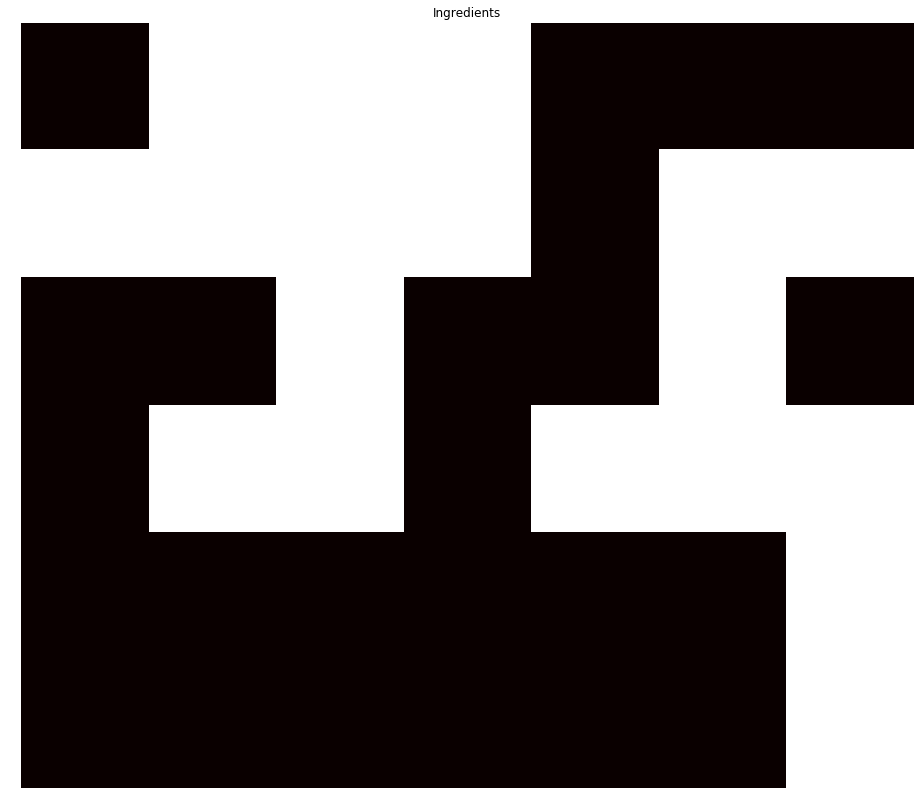

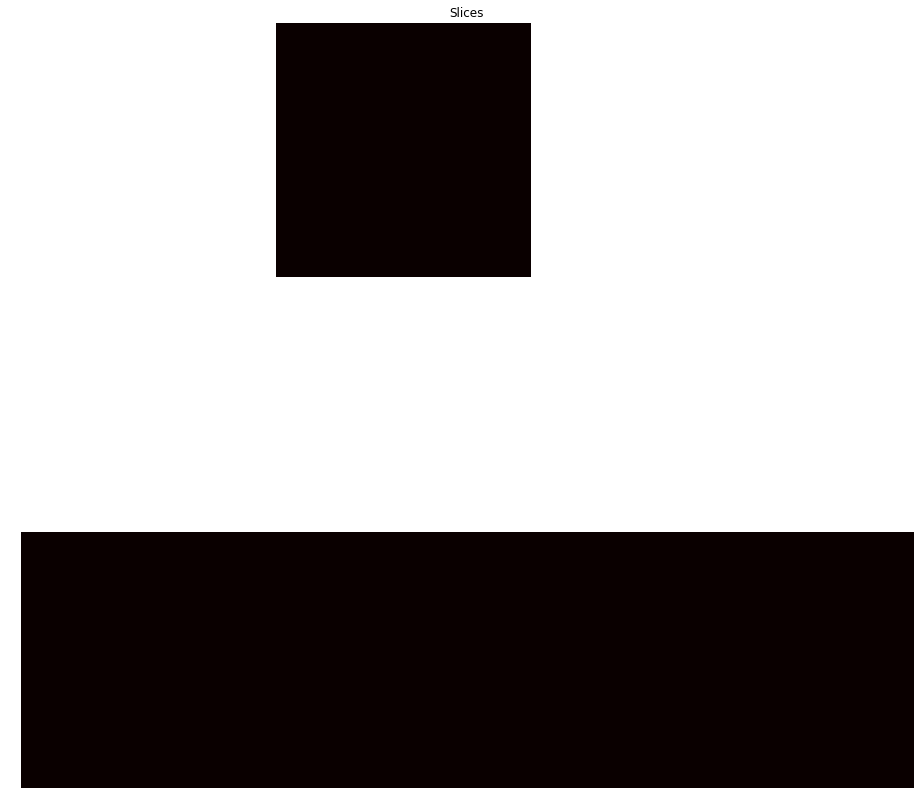

In [127]:
%%time
R, C, L, H, M = load_problem(PROBLEM_B)
print('Rows (R): {}\nColumns (C): {}\nIngredients (L): {}\nMax. cells (H): {}'.format(R, C, L, H))
plot_problem(M, 'Ingredients')
T, R = partitionize9(M, L, H)
plot_problem(T, 'Slices')


In [125]:
R

{(0, 0): (1, 2), (2, 0): (3, 2), (4, 0): (5, 2)}

In [59]:
T.shape

(200, 250)

# Loading the problem

Rows (R): 1000
Columns (C): 1000
Ingredients (I): 6
Max. cells (H): 14
Total score: 873868
Max score: 1000000
Efficiency: 87.39%
Wall time: 2.13 s


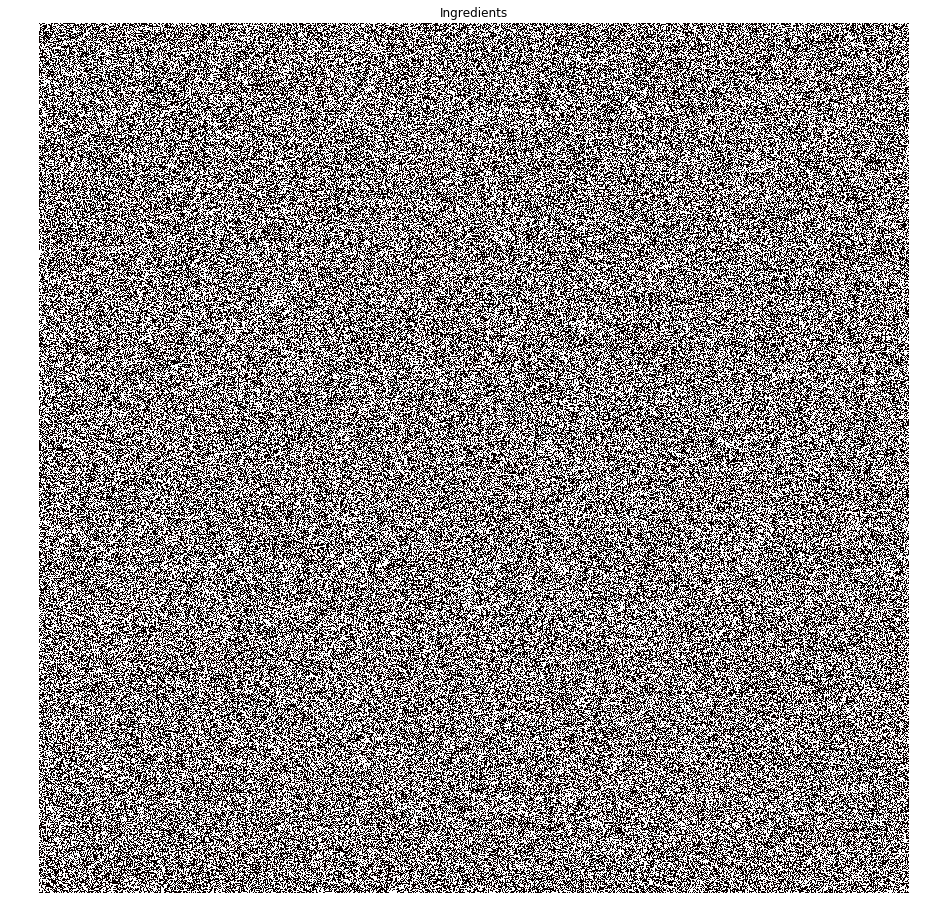

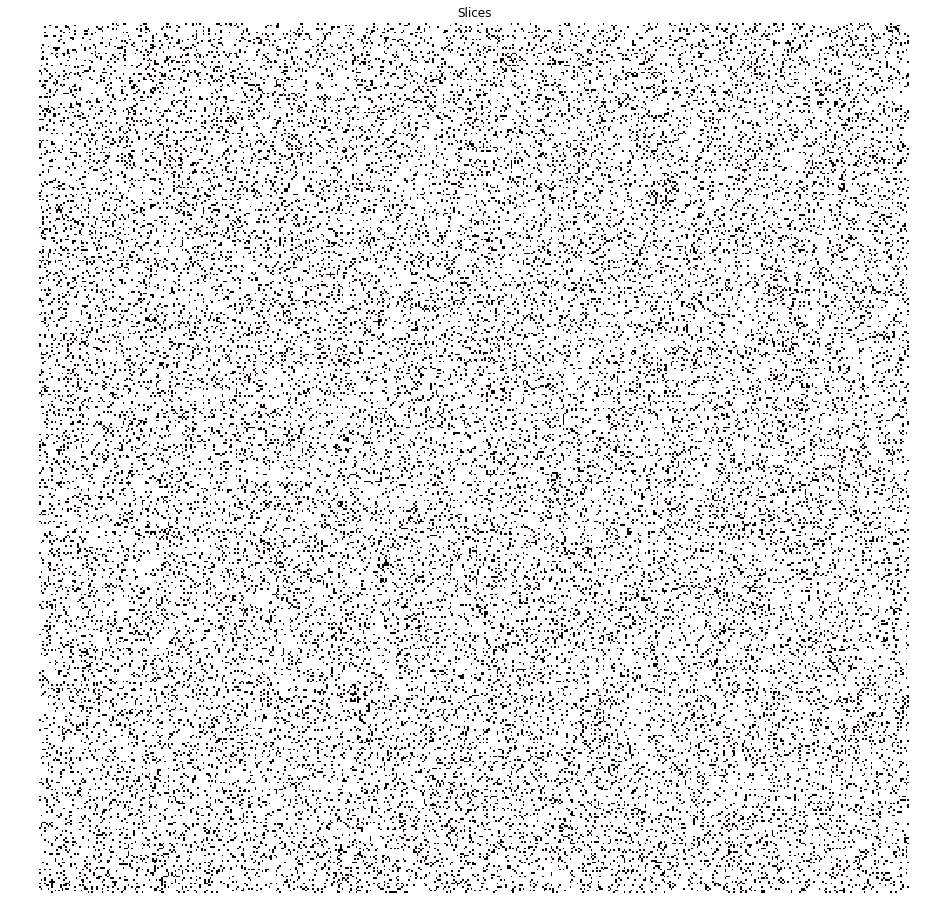

In [546]:
%%time
R, C, L, H, M = load_problem(PROB)
print('Rows (R): {}\nColumns (C): {}\nIngredients (I): {}\nMax. cells (H): {}'.format(R, C, L, H))
plot_problem(M, 'Ingredients')
T = partitionize1(M)
plot_problem(T, 'Slices')

Rows (R): 1000
Columns (C): 1000
Ingredients (I): 6
Max. cells (H): 14
Total score: 922756
Max score: 1000000
Efficiency: 92.28%
Wall time: 2.29 s


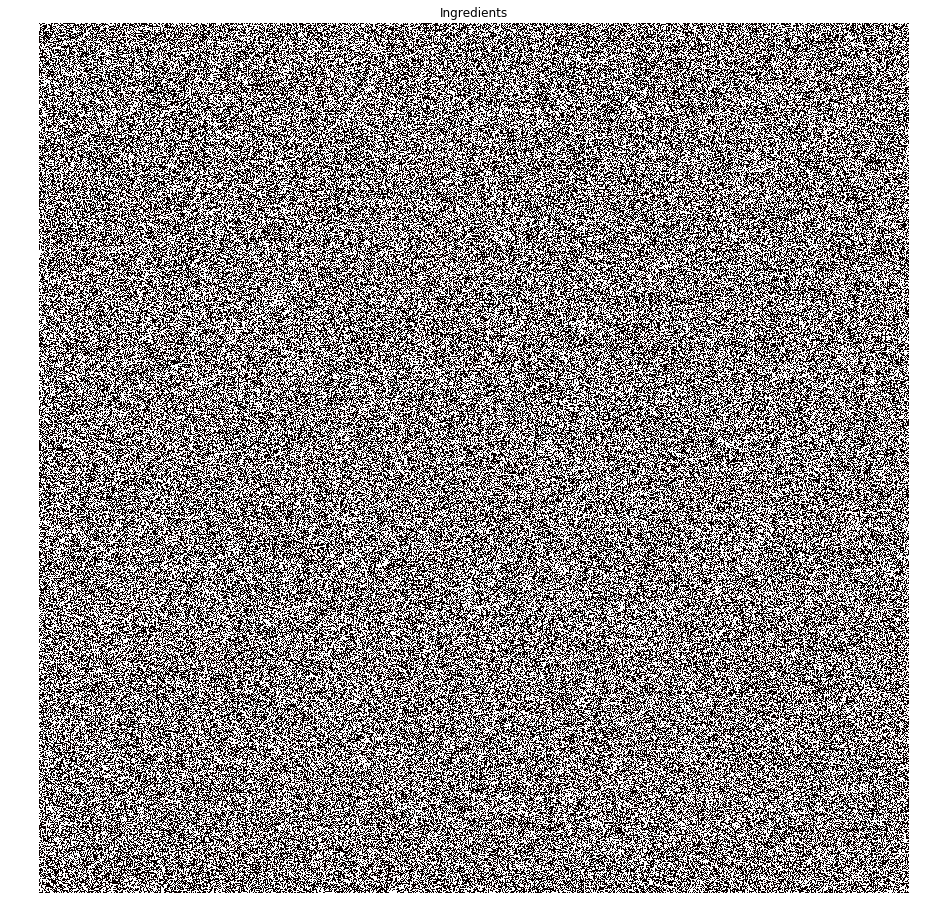

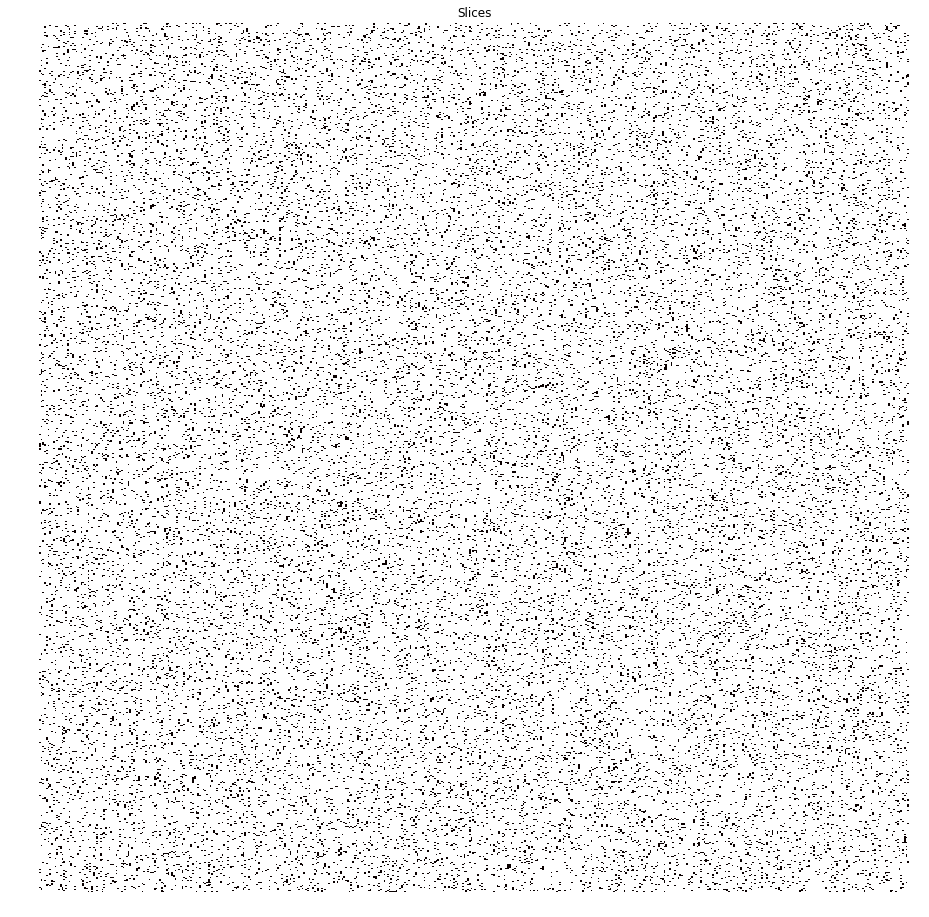

In [547]:
%%time
R, C, L, H, M = load_problem(PROB)
print('Rows (R): {}\nColumns (C): {}\nIngredients (I): {}\nMax. cells (H): {}'.format(R, C, L, H))
plot_problem(M, 'Ingredients')
T = partitionize2(M)
plot_problem(T, 'Slices')

Rows (R): 1000
Columns (C): 1000
Ingredients (I): 6
Max. cells (H): 14
Total score: 922490
Max score: 1000000
Efficiency: 92.25%
Wall time: 2.29 s


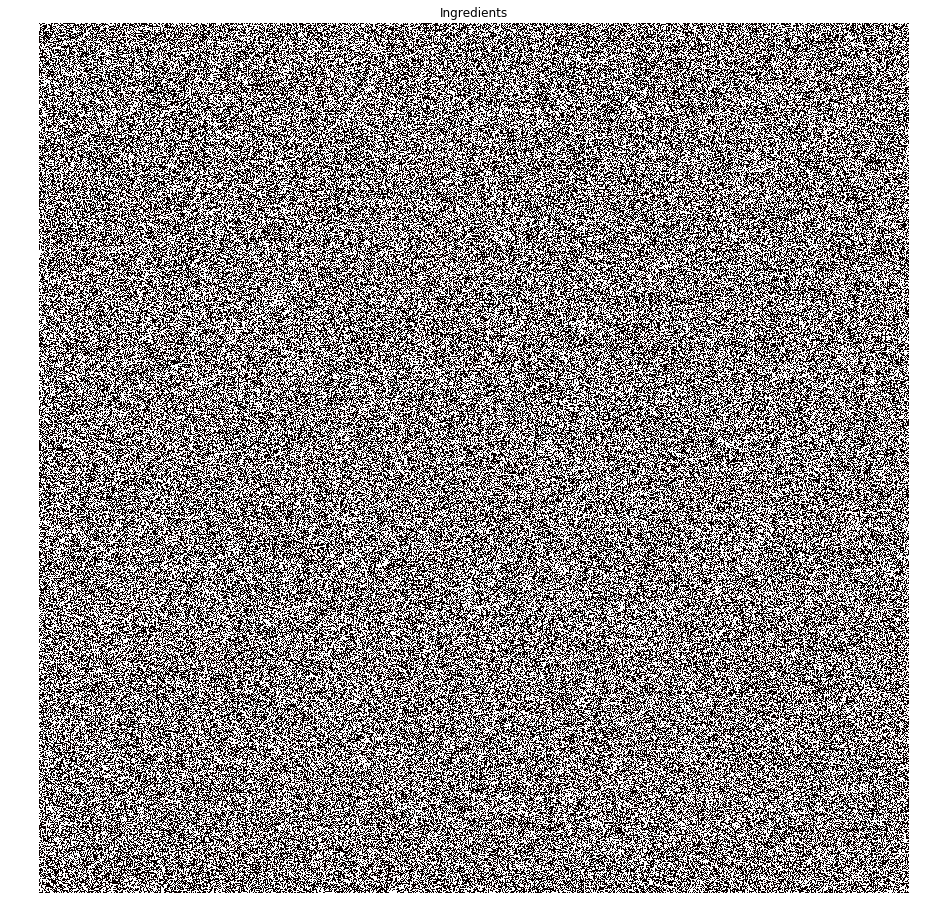

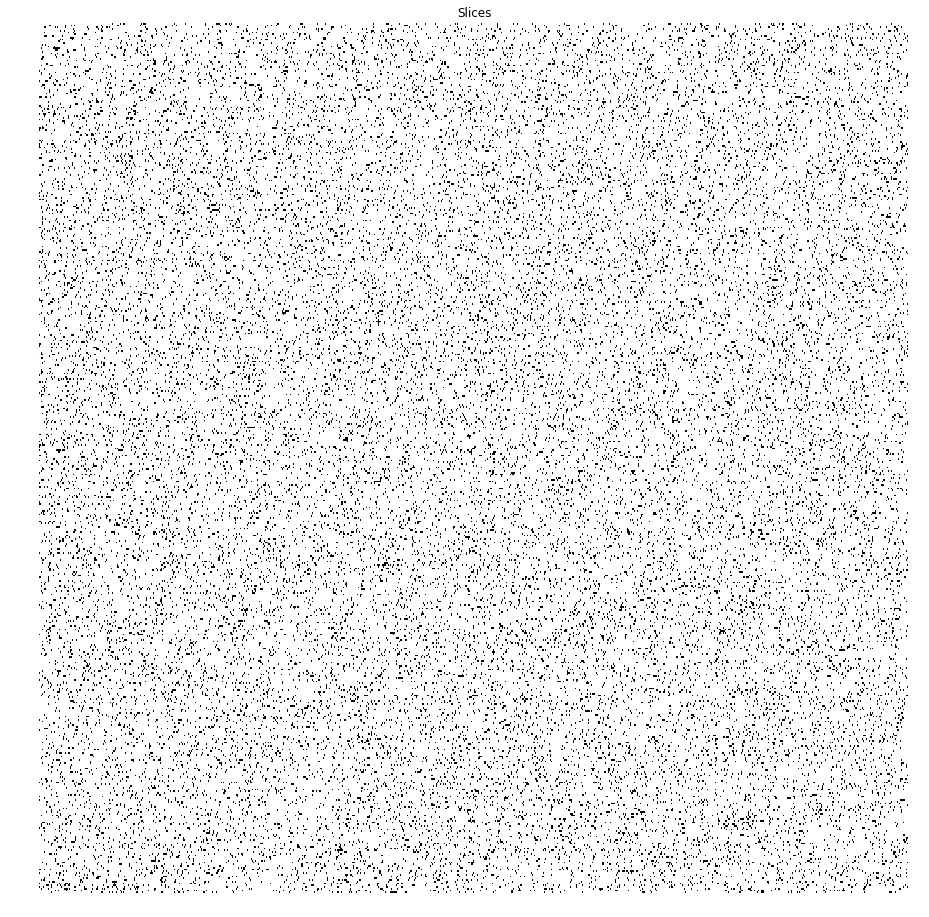

In [548]:
%%time
R, C, L, H, M = load_problem(PROB)
print('Rows (R): {}\nColumns (C): {}\nIngredients (I): {}\nMax. cells (H): {}'.format(R, C, L, H))
plot_problem(M, 'Ingredients')
T = partitionize3(M)
plot_problem(T, 'Slices')

Rows (R): 1000
Columns (C): 1000
Ingredients (I): 6
Max. cells (H): 14
Total score: 999818
Max score: 1000000
Efficiency: 99.98%
Wall time: 4.69 s


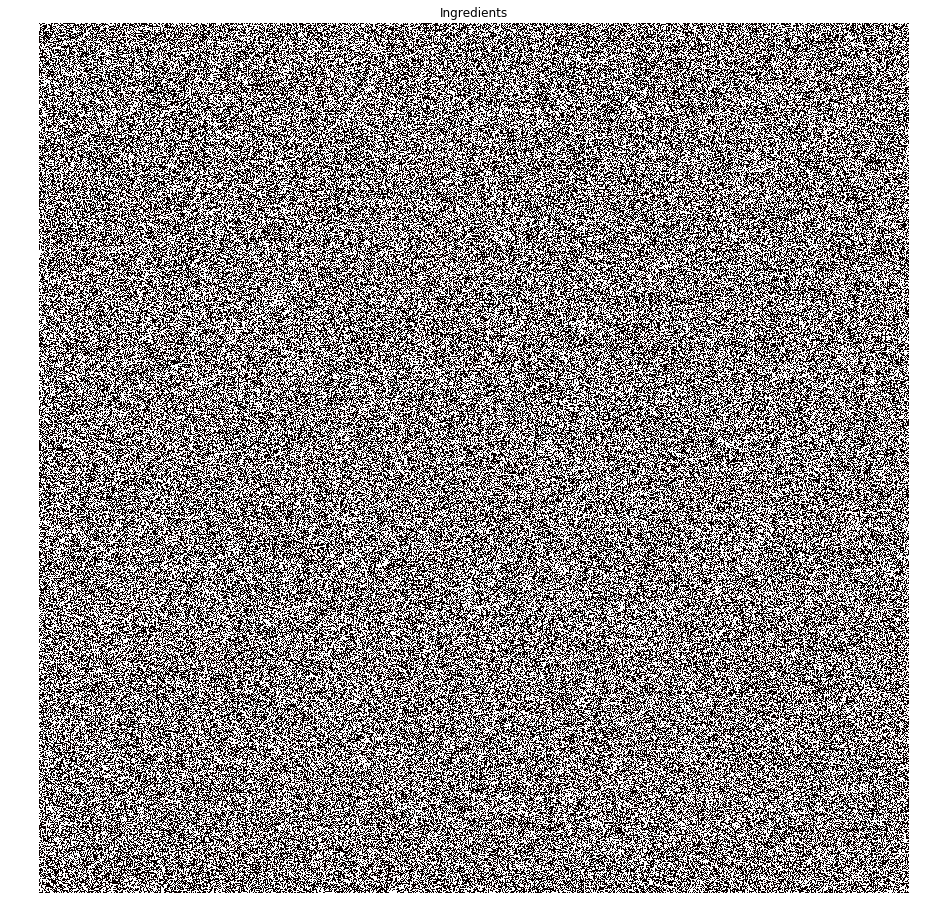

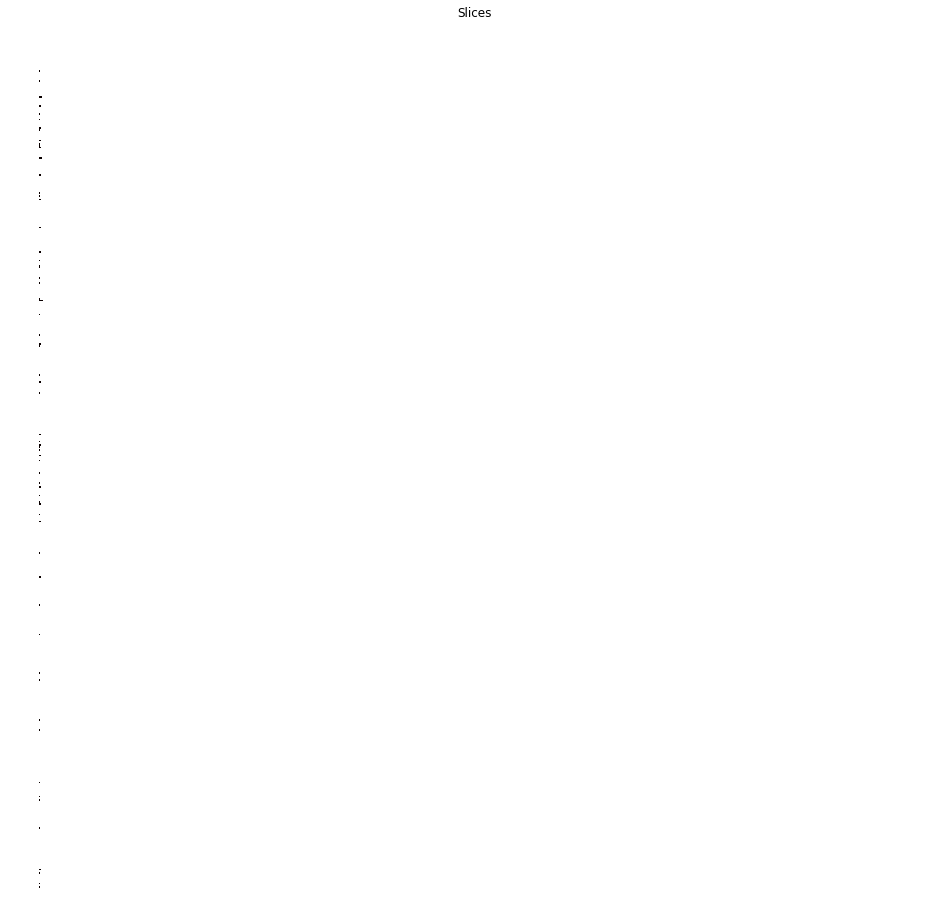

In [549]:
%%time
R, C, L, H, M = load_problem(PROB)
print('Rows (R): {}\nColumns (C): {}\nIngredients (I): {}\nMax. cells (H): {}'.format(R, C, L, H))
plot_problem(M, 'Ingredients')
T = partitionize4(M)
plot_problem(T, 'Slices')

Rows (R): 200
Columns (C): 250
Ingredients (I): 4
Max. cells (H): 12
Total score: 49968
Max score: 50000
Efficiency: 99.94%
Wall time: 219 ms


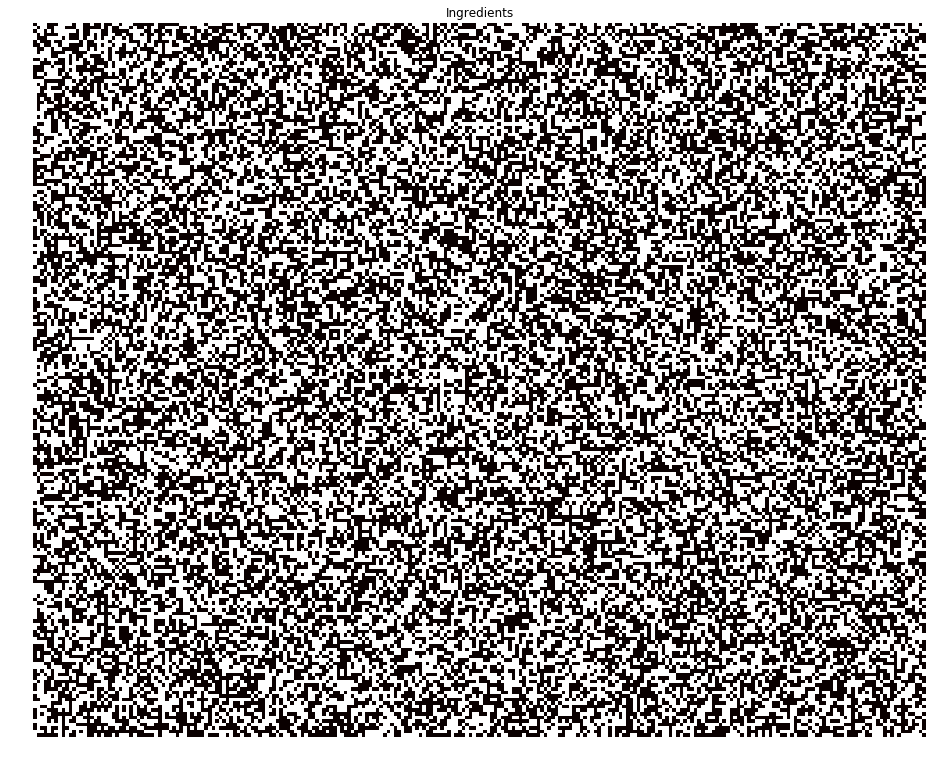

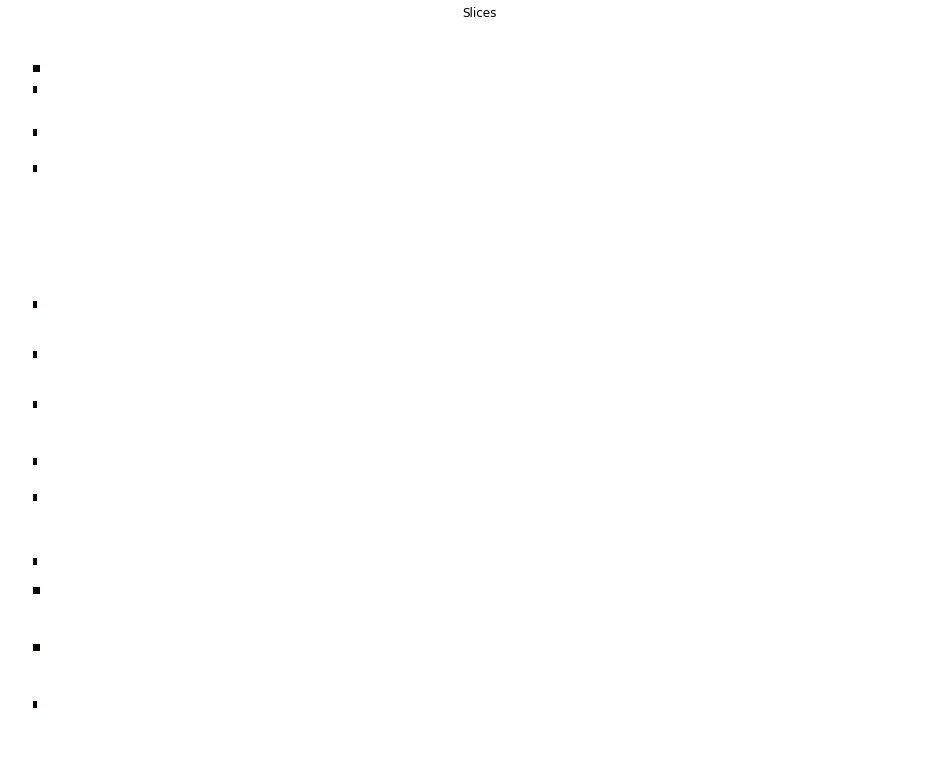

In [17]:
%%time
R, C, L, H, M = load_problem(PROBLEM_C)
print('Rows (R): {}\nColumns (C): {}\nIngredients (I): {}\nMax. cells (H): {}'.format(R, C, L, H))
plot_problem(M, 'Ingredients')
T = partitionize5(M)
plot_problem(T, 'Slices')

Rows (R): 200
Columns (C): 250
Ingredients (I): 4
Max. cells (H): 12
Total score: 49676
Max score: 50000
Efficiency: 99.35%
Wall time: 231 ms


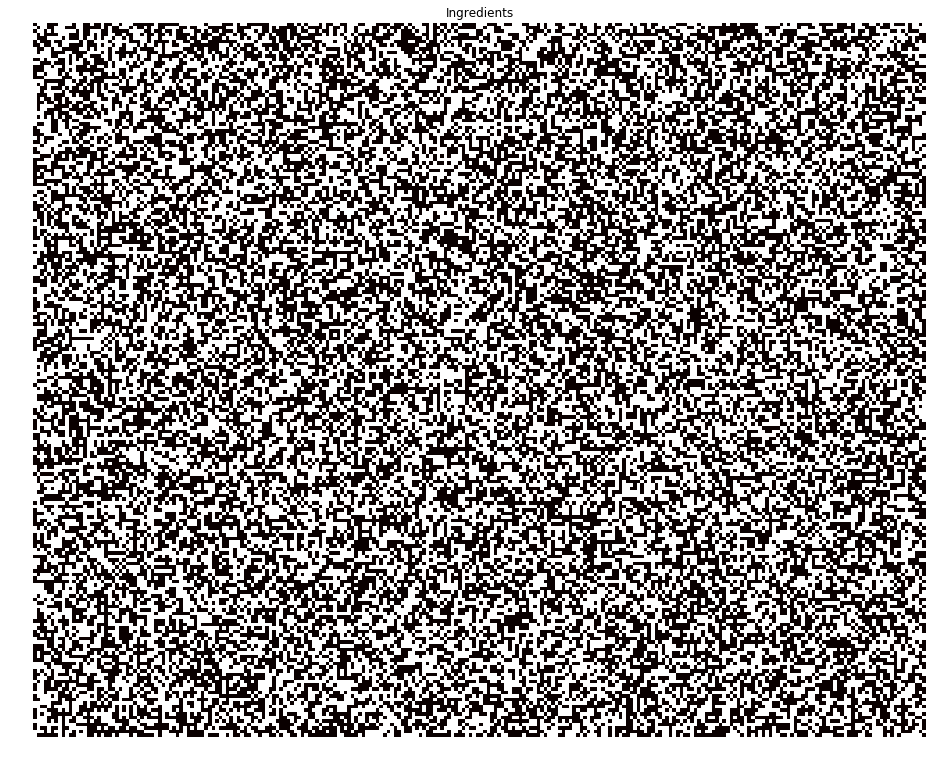

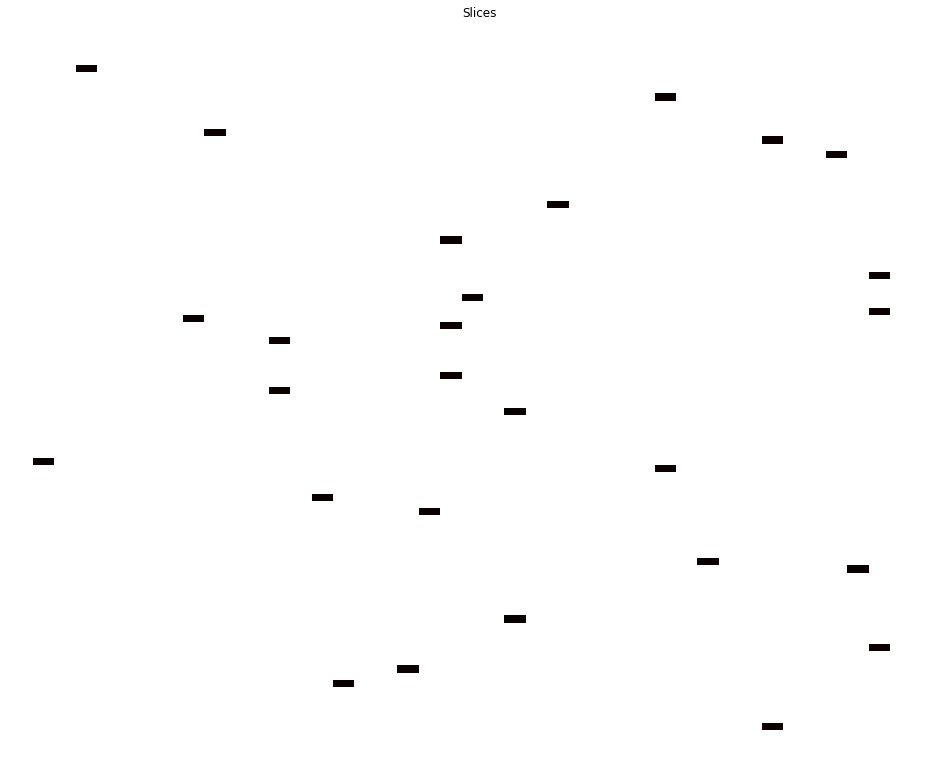

In [45]:
%%time
R, C, L, H, M = load_problem(PROBLEM_C)
print('Rows (R): {}\nColumns (C): {}\nIngredients (I): {}\nMax. cells (H): {}'.format(R, C, L, H))
plot_problem(M, 'Ingredients')
T = partitionize7(M, 3)
plot_problem(T, 'Slices')

# Cell depth map

In [538]:
%%time
D = np.vectorize(lambda x: 0 if x > 0 else None)(M)
D

clear_pass = False
depth = 0

while not clear_pass:
    clear_pass = True
    for x in range(C):
        for y in range(R):
            if D[y,x] != 0:
                
                cells = []
                if x-1 >= 0 and D[y, x-1] != None: cells.append(D[y, x-1])
                if x+1 < C and D[y, x+1] != None: cells.append(D[y, x+1])
                if y-1 >= 0 and D[y-1, x] != None: cells.append(D[y-1, x])
                if y+1 < R and D[y+1, x] != None: cells.append(D[y+1, x])
                if np.min(cells) + 1 != D[y,x]:
                    D[y,x] = np.min(cells) + 1
                    depth = np.max([np.min(cells) + 1, depth])
                    clear_pass = False
                

Wall time: 36.1 s


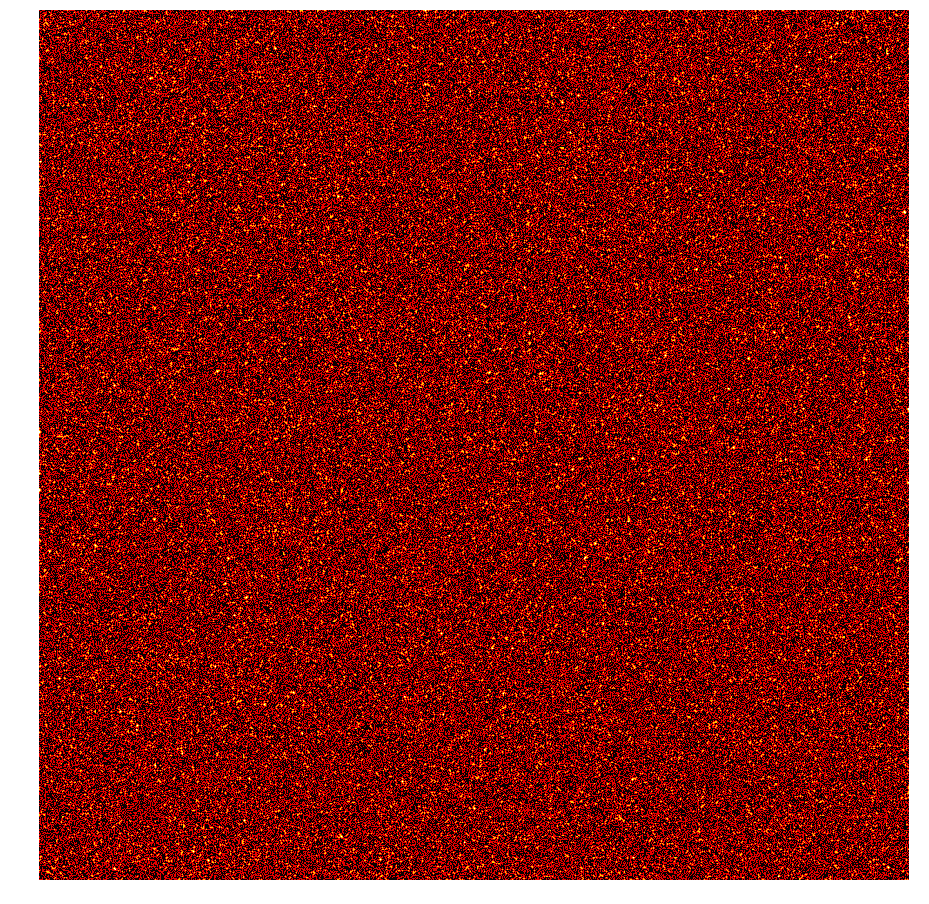

In [539]:
plt.figure(figsize=(16,16))
plt.imshow(D.astype('float'), cmap=cm.hot);
plt.axis('off')
plt.grid()

In [540]:
from mpl_toolkits.mplot3d import Axes3D

(0, 30)

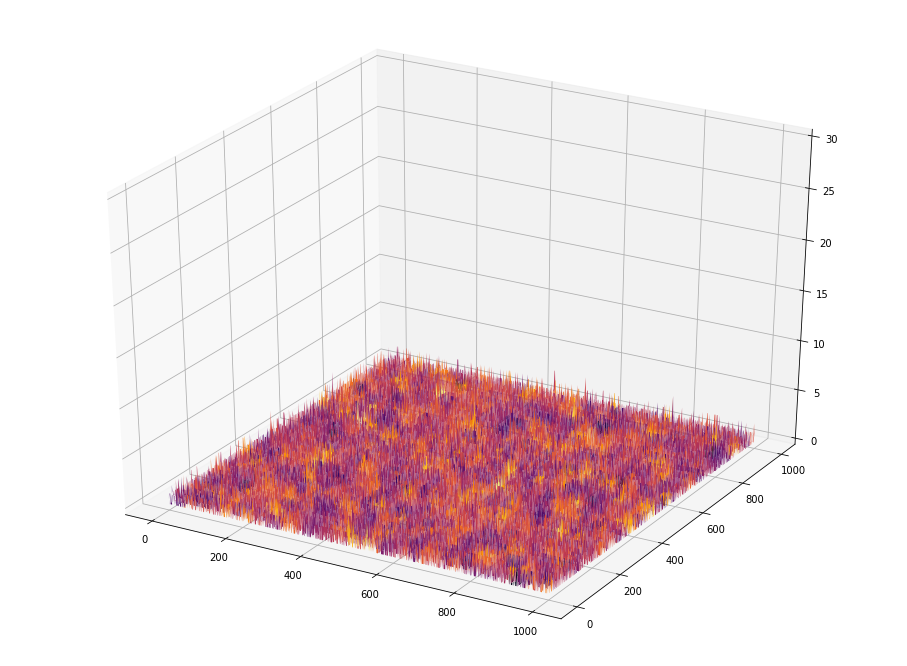

In [541]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')
xs = range(D.shape[0])
ys = range(D.shape[1])
X, Y = np.meshgrid(xs, ys)
#zs = np.array([f(x, y) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = D.astype('float')
surf = ax.plot_surface(X, Y, Z.T, cmap=cm.inferno)
ax.set_zlim([0,30])

# Hello world!

Dit is mijn eerste programma!

In [38]:
print("Hello world!")

Hello world!


$$ \int^a_b x^2 dx = \dfrac{1}{3}x^3 + C$$